In [39]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Create a set of random latitude and longitude combination
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [41]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [42]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [43]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [44]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [45]:
# Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c69d4102d300cea33c9753ae66a20466


In [46]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [47]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wahran
City not found. Skipping...
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | berlevag
Processing Record 5 of Set 1 | zabaykalsk
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | buraydah
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | roma
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | dongsheng
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | havoysund
Processing Record 20 of Set 1 | sorvag
City not found. Skipping...
Processing Record 21 of Set 1 | ch

Processing Record 40 of Set 4 | usinsk
Processing Record 41 of Set 4 | victoria
Processing Record 42 of Set 4 | kinshasa
Processing Record 43 of Set 4 | soe
Processing Record 44 of Set 4 | chipinge
Processing Record 45 of Set 4 | bokspits
City not found. Skipping...
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | suixi
Processing Record 49 of Set 4 | jacqueville
Processing Record 50 of Set 4 | sorland
Processing Record 1 of Set 5 | jojoima
Processing Record 2 of Set 5 | yialos
City not found. Skipping...
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | ballstad
City not found. Skipping...
Processing Record 5 of Set 5 | vaitape
Processing Record 6 of Set 5 | san angelo
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | zelenoborsk
Processing Record 9 of Set 5 | voiste
City not found. Skipping...
Processing Record 10 of Set 5 | clyde river
Processing Re

Processing Record 27 of Set 8 | adet
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | namatanai
Processing Record 30 of Set 8 | yithion
City not found. Skipping...
Processing Record 31 of Set 8 | taoudenni
Processing Record 32 of Set 8 | muscat
Processing Record 33 of Set 8 | burgeo
Processing Record 34 of Set 8 | santa maria
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | canavieiras
Processing Record 37 of Set 8 | semnan
Processing Record 38 of Set 8 | barda
Processing Record 39 of Set 8 | mandiana
Processing Record 40 of Set 8 | bykovo
Processing Record 41 of Set 8 | la ronge
Processing Record 42 of Set 8 | collie
Processing Record 43 of Set 8 | sobolevo
Processing Record 44 of Set 8 | pompeia
Processing Record 45 of Set 8 | mata
Processing Record 46 of Set 8 | aswan
Processing Record 47 of Set 8 | sindou
Processing Record 48 of Set 8 | bara
Processing Record 49 of Set 8 | banda aceh
Processing Record 50 of Set 8 | mao
Processing R

Processing Record 18 of Set 12 | marrakesh
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | inuvik
Processing Record 21 of Set 12 | lake charles
Processing Record 22 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 12 | kasangulu
Processing Record 24 of Set 12 | aleksandrov gay
Processing Record 25 of Set 12 | karambakkudi
Processing Record 26 of Set 12 | paragominas
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | warrnambool
Processing Record 29 of Set 12 | robstown
Processing Record 30 of Set 12 | abonnema
Processing Record 31 of Set 12 | faya
Processing Record 32 of Set 12 | morant bay
Processing Record 33 of Set 12 | tahlequah
Processing Record 34 of Set 12 | ararangua
Processing Record 35 of Set 12 | grand centre
City not found. Skipping...
Processing Record 36 of Set 12 | gori
Processing Record 37 of Set 12 | aitape
Processing Record 38 of Set 12 | george
Processing Record 39 of Set 12 | t

In [50]:
len(city_data)

575

In [52]:
# Convert the array of Dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,33.01,100,90,23.02,CA,2021-01-27 06:02:44
1,Rikitea,-23.1203,-134.9692,79.70,75,43,12.35,PF,2021-01-27 06:02:45
2,Berlevag,70.8578,29.0864,24.80,80,75,12.66,NO,2021-01-27 06:02:45
3,Zabaykalsk,49.6333,117.3167,-6.92,88,90,13.38,RU,2021-01-27 06:02:45
4,Cape Town,-33.9258,18.4232,69.01,82,75,12.66,ZA,2021-01-27 06:00:24
5,Buraydah,26.3260,43.9750,51.80,62,0,2.30,SA,2021-01-27 06:02:45
6,Mataura,-46.1927,168.8643,60.01,80,99,21.99,NZ,2021-01-27 06:02:46
7,Puerto Ayora,-0.7393,-90.3518,77.00,95,47,5.99,EC,2021-01-27 06:02:46
8,Henties Bay,-22.1160,14.2845,68.00,87,85,3.62,NA,2021-01-27 06:02:46
9,Roma,43.2128,-75.4557,27.00,86,90,8.05,US,2021-01-27 06:02:46


In [55]:
# Assign a new column order.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2021-01-27 06:02:44,47.6666,-52.7314,33.01,100,90,23.02
1,Rikitea,PF,2021-01-27 06:02:45,-23.1203,-134.9692,79.70,75,43,12.35
2,Berlevag,NO,2021-01-27 06:02:45,70.8578,29.0864,24.80,80,75,12.66
3,Zabaykalsk,RU,2021-01-27 06:02:45,49.6333,117.3167,-6.92,88,90,13.38
4,Cape Town,ZA,2021-01-27 06:00:24,-33.9258,18.4232,69.01,82,75,12.66
5,Buraydah,SA,2021-01-27 06:02:45,26.3260,43.9750,51.80,62,0,2.30
6,Mataura,NZ,2021-01-27 06:02:46,-46.1927,168.8643,60.01,80,99,21.99
7,Puerto Ayora,EC,2021-01-27 06:02:46,-0.7393,-90.3518,77.00,95,47,5.99
8,Henties Bay,NA,2021-01-27 06:02:46,-22.1160,14.2845,68.00,87,85,3.62
9,Roma,US,2021-01-27 06:02:46,43.2128,-75.4557,27.00,86,90,8.05


In [56]:
# Create the Output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

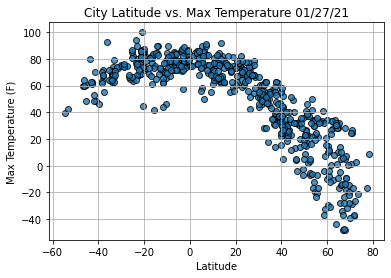

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

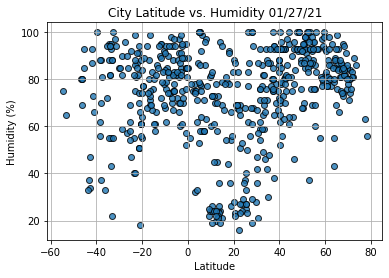

In [61]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

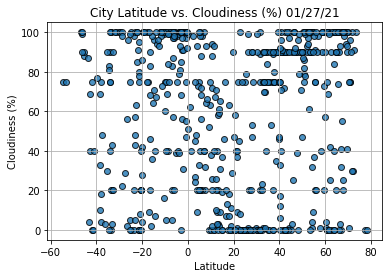

In [62]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

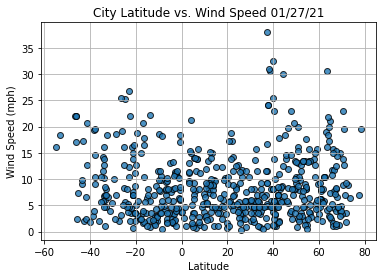

In [63]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()